In [1]:
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from keras.models import Sequential, load_model, Model,Input
from keras.layers import Dense,GlobalAvgPool2D, Conv2D, MaxPool2D,AvgPool2D, GlobalAveragePooling2D,AveragePooling2D ,Softmax, BatchNormalization, ReLU, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import concatenate,Concatenate
import matplotlib.pyplot as plt
from matplotlib.image import imread 
%matplotlib inline
import pandas as pd
import numpy as np
import cv

In [24]:
weight = load_model('dense.h5')


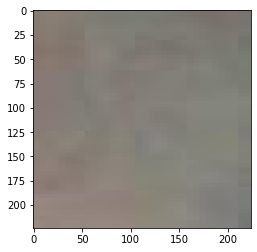

In [31]:
image = load_img('/home/fatmaosama/Desktop/GP/PartA_Splitted/train/Normal/234_NormalFeet172.jpg', target_size=(224, 224))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [32]:
result = weight.predict(image)

result

array([[1., 0.]], dtype=float32)

In [37]:
test_data_generation = ImageDataGenerator(rescale=1./255)
testing_set = test_data_generation.flow_from_directory('/home/fatmaosama/Desktop/GP/Ischaemia',
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='binary',seed=0)

Found 63 images belonging to 2 classes.


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score

true_labels = np.concatenate([testing_set.next()[1] for i in range(testing_set.__len__())])
true_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.], dtype=float32)

In [39]:
#prediction = weight.predict_classes(testing_set)
prediction=weight.predict(testing_set)
classes_x=np.argmax(prediction,axis=1)
classes_x

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1])

In [40]:
cf = confusion_matrix(y_true= true_labels, y_pred= classes_x)
score = accuracy_score(y_true= true_labels, y_pred=classes_x)
print(cf)
print('the model performane is: ', score*100, "%")

[[29  0]
 [ 5 29]]
the model performane is:  92.06349206349206 %
